In [16]:
import zipfile
from zipfile import ZipFile as zp

from PIL import Image
import pytesseract as ps
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
z= zp('readonly/images.zip') 
print(z.infolist())

z.extractall()
for i in z.infolist():
    print(i.filename)
    img = Image.open(i.filename)
    ps.image_to_string(img)
    cv_img = cv.imread(i.filename)
# tesseract to find Christopher in text.. when found use openCv on that page and make contact sheet using PIL

[<ZipInfo filename='a-0.png' compress_type=deflate external_attr=0x20 file_size=21000053 compress_size=20835185>, <ZipInfo filename='a-1.png' compress_type=deflate external_attr=0x20 file_size=22598429 compress_size=20879041>, <ZipInfo filename='a-2.png' compress_type=deflate external_attr=0x20 file_size=3650049 compress_size=3320620>, <ZipInfo filename='a-3.png' compress_type=deflate external_attr=0x20 file_size=18646538 compress_size=16564827>]
a-0.png
a-1.png
a-2.png
a-3.png


In [1]:
import zipfile
from zipfile import ZipFile as zp

from PIL import Image
import pytesseract as ps
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
z= zp('readonly/images.zip') 
print(z.infolist())

z.extractall()
d=dict()
for i in range(len(z.infolist())):
    use= z.infolist()[i]
    img = Image.open(use.filename)
    d[use.filename]=ps.image_to_string(img).replace('\n',' ')
    

[<ZipInfo filename='a-0.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=21000053 compress_size=20825784>, <ZipInfo filename='a-1.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=22598429 compress_size=20777241>, <ZipInfo filename='a-10.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=18166003 compress_size=17958880>, <ZipInfo filename='a-11.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=7458745 compress_size=6390977>, <ZipInfo filename='a-12.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=2421677 compress_size=2170555>, <ZipInfo filename='a-13.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=26822842 compress_size=24672507>, <ZipInfo filename='a-2.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=3650049 compress_size=3304841>, <ZipInfo filename='a-3.png' compress_type=

Results found in file a-0.png


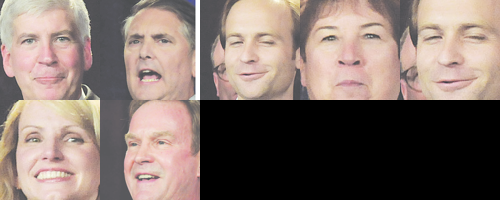

Results found in file a-1.png


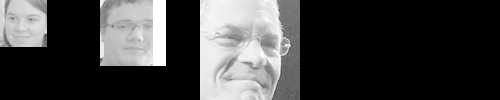

Results found in file a-10.png


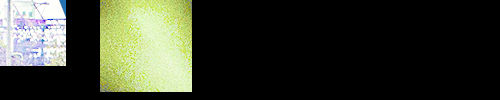

Results found in file a-13.png


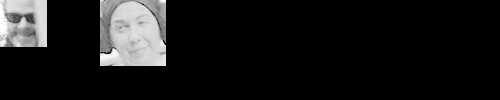

Results found in file a-2.png


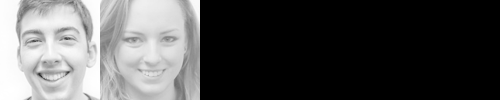

Results found in file a-3.png


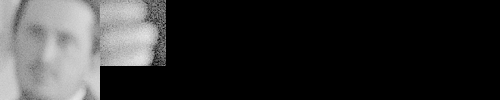

Results found in file a-8.png


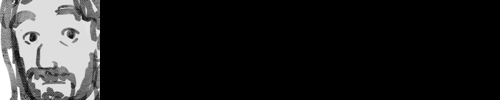

In [19]:
#dict with image filename and text
import math, PIL

for i in z.infolist():
    cropped_images=[]
    if 'Mark' in d[i.filename]:
        cv_img = cv.imread(i.filename)
        gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.4)
        print('Results found in file',i.filename)
        if len(faces):
            pil_im = Image.open(i.filename)
            for x,y,w,h in faces:
                im = pil_im.crop((x,y,w+x,h+y))
                im.thumbnail((100,100))
                cropped_images.append(im)
            # now we have to make contact_sheet
            first_image = cropped_images[0]
            contact_sheet = PIL.Image.new(im.mode, (500, 100*math.ceil(len(cropped_images)/5) ))
            x=0
            y=0
            for img in cropped_images:
                contact_sheet.paste(img, (x,y))
                if x+100== 500:
                    x=0
                    y=y+100
                else:
                    x=x+100
            display(contact_sheet)
        else:
            print('But there were no faces in that file!')



In [16]:
cv_img = cv.imread(use.filename)
gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.35)
print(len(faces))

6
